In [81]:
# базу даних демонструє результати виконання тестів на увагу в двох групах
# була згенерована з інтернет-ресурсу https://statpsy.ru/t-student/primer-t-test-ind/
# з даної сторінки була взята тільки початкова таблиця даних, подальші розрахунки і пояснення не брались до уваги

import pandas as pd
data = pd.DataFrame({
    "Group1" : [30, 45, 41, 38, 34, 36, 31, 30, 49, 50, 51, 46, 41, 37, 36, 34, 33, 49, 32, 46],
    "Group2" : [46, 49, 52, 55, 56, 40, 47, 51, 58, 46, 46, 56, 53, 57, 44, 42, 40, 58, 54, 53]
})

data

,Group1,Group2
0,30,46
1,45,49
2,41,52
3,38,55
4,34,56
5,36,40
6,31,47
7,30,51
8,49,58
9,50,46


Text(0.5, 0, 'Second')

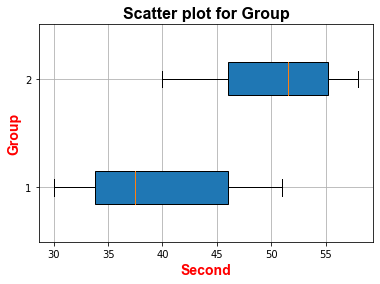

In [82]:
import matplotlib.pyplot as plt
current_data = [data["Group1"], data["Group2"]]
plt.boxplot(x = current_data, vert = False, patch_artist = True, widths = 0.3)
plt.grid()
plt.title('Scatter plot for Group', {'fontname':'Arial'}, fontweight = 'bold', fontsize = 16);
plt.ylabel('Group', {'fontname':'Arial'}, color = 'r', fontweight = 'bold', fontsize = 14)
plt.xlabel('Second', {'fontname':'Arial'}, color = 'r', fontweight = 'bold', fontsize = 14)

In [83]:
# потрібні значення з таблиці критичних даних для критерію Лівеня буду брати вручну, а не програмою, як в попередній лабі
# через те, що таблиця складена незручно, немає можливості дістатись до потрібних індексів 
# та неоднакова кількість ступенів свободи для двох груп

# отже критичне значення для критерію Лівеня враховуючи наші дані, а саме: ступені свободи обох груп 20-1 = 19 
# дорівнює 1,77. Далі буду брати його як константу Value_freedom_degree

In [84]:
Value_freedom_degree = 1.77

# функція оцінки вімінностей дисперсій між групами за критерієм Лівеня
def Liven():
    Result = []
    
# умова та застосування формули за критерієм Лівеня
    if (data["Group1"].std()) ** 2 >= (data["Group2"].std()) ** 2:
        F = (data["Group1"].std()) ** 2 / (data["Group2"].std()) ** 2
    else:
        F = (data["Group2"].std()) ** 2 / (data["Group1"].std()) ** 2
    Result.append(F)
    
# оцінка рівності дисперсій
    if F > Value_freedom_degree:
        Result.append("significant")
    else:
        Result.append("not significant")
    
    return Result
    
print(Liven())

[1.4718514652151222, 'not significant']


In [85]:
# підключення таблиці критичних значень для критерію Стьюдента
file = 'C:/Users/Alex/Desktop/BMD/Laba7/Critical_Student.xlsx'
xl = pd.ExcelFile(file)
Critical_Student = xl.parse('Лист1')
print(Critical_Student)

     df  p=0,05
0     1  12.700
1     2   4.303
2     3   3.182
3     4   2.776
4     5   2.571
..  ...     ...
86  150   1.976
87  200   1.972
88  250   1.969
89  300   1.968
90  350   1.967

[91 rows x 2 columns]


In [86]:
# функція для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій
import math

def Student():
    Result = []
    N = data.shape[0]
    
# умова та застосування різних формул за критерієм Стьюдента, залежно від попередньої оцінки рівності    
    if Liven()[1] == "not significant":
        t = (abs(data["Group1"].mean() - data["Group2"].mean()))/(math.sqrt((data["Group1"].std()) ** 2 / N + (data["Group1"].std()) ** 2 / N))
        Result.append(t)
    elif Liven()[1] == "significant":
        t = (abs(data["Group1"].mean() - data["Group2"].mean()))/(math.sqrt(((N-1) * data["Group1"].std()) ** 2 + ((N-1) * data["Group2"].std()) ** 2) / (N + N - 2) * (1/N + 1/N))
        Result.append(t)
    
# запис значення ступеня свободи з імпортованої таблиці
    Freedom_degree = N + N - 2
    Value = Critical_Student["p=0,05"][Freedom_degree - 1]
    Result.append(Value)

# оцінка значимості зв'язку
    if t > Value:
        Result.append("not equal")
    else:
        Result.append("equal")

    return Result
    
print(Student())

# варто пояснити чому я передаю значення "equal" та "not equal" замість "significant" і "not significant"
# Наскільки я розумію ми перевіряємо нульову гіпотезу, як звучить так: середні двох незалежних груп рівні  
# що в перекладі на англійську звучить як means of the two groups are equal
# significant же означає значимість. Я трохи не розумію де в цьому тесті ми перевіряємо значимість)
# Тому я зробив висновок виходячи з тої нульової гіпотези, яку ми і перевіряли данною роботою

[4.694755749417024, 2.024, 'not equal']
